In [7]:
# Add below current directory to path
# Notebook cannot import any code without this line !!!!
import sys; sys.path.insert(0, '..')

import numpy as np

from src.utils.ConvexSettings import batch_sizes, models, dimensions
from src.utils.Utilities import pickle_loader
from src.utils.runner.RunnerUtilities import create_path_and_folders
from src.utils.ErrorPlotter import plot_error_dist

from src.experiments_runner import batch_step_size, deacreasing_step_size

In [2]:
def regenerate_and_plot_all_figures(dataset: str, stochastic: bool):
    stochasticity = 'sto' if stochastic else "full"
    print("Mode: {0}".format(stochasticity))

    # Some configuration.
    batch_size = batch_sizes[dataset]
    model = models[dataset]
    dim = dimensions[dataset]
    nb_devices = 20
    algos = "mcm-vs-existing"
    iid = "non-iid"
    fraction_sampled_workers = 1
    if stochastic:
        experiments_settings = "{0}-b{1}".format(stochasticity, batch_size)
    else:
        experiments_settings = stochasticity

    # Getting path to pickle, data ...
    data_path, pickle_path, algos_pickle_path, picture_path = create_path_and_folders(nb_devices, dataset, iid, algos, 
                                                                                  fraction_sampled_workers)

    # Loading the pickle file.
    obj_min = pickle_loader("{0}/obj_min".format(pickle_path))
    print("Obj min:", obj_min)
    res = pickle_loader("{0}/descent-{1}".format(algos_pickle_path, experiments_settings))

    # Generating, saving, plotting the excess loss w.r.t. number of iterations and communicated bits.
    plot_error_dist(res.get_loss(obj_min), res.names, res.nb_devices, dim,
                    all_error=res.get_std(obj_min), x_legend="Number of passes on data",
                    picture_name="{0}/it-noavg-{1}".format(picture_path, experiments_settings))
    plot_error_dist(res.get_loss(obj_min), res.names, res.nb_devices, dim,
                    x_points=res.X_number_of_bits, x_legend="Communicated bits",
                    all_error=res.get_std(obj_min), picture_name="{0}/bits-noavg-{1}"
                    .format(picture_path, experiments_settings))
        

## Least-square regression, toy dataset: $γ= (L \sqrt k)^{-1}$, $\sigma_*^2 \neq 0$.

Mode: sto
Obj min: 0.12968200789764522


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


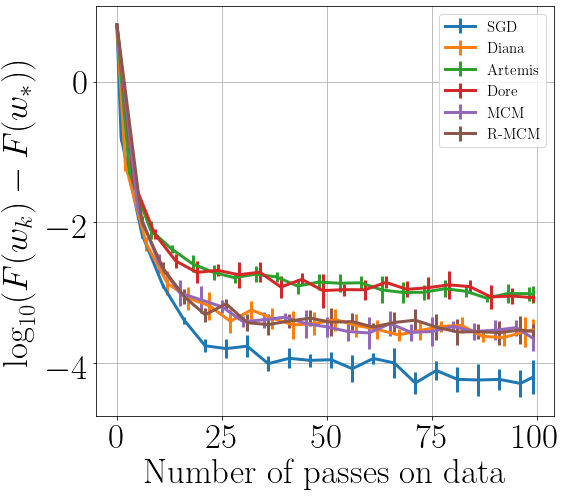

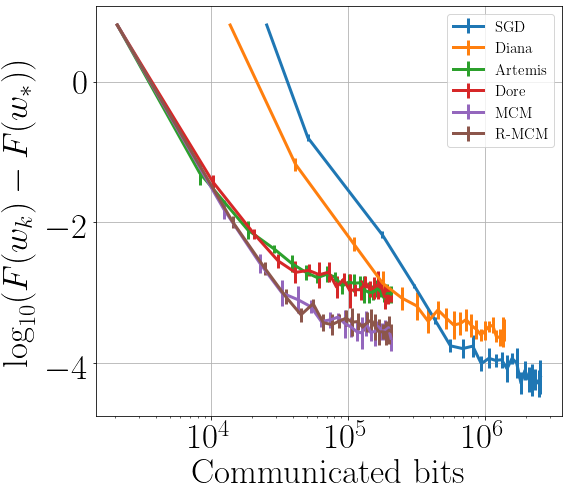

In [8]:
regenerate_and_plot_all_figures("synth_linear_noised", True)

## Least-square regression, toy dataset: $γ= 1/L$, $\sigma_*^2 = 0$.

Mode: full
Obj min: 0.12968200789764522


../src/utils/runner/ResultsOfSeveralDescents.py:94: RuntimeWarning: invalid value encountered in log10
  log_losses = [np.log10(loss - obj) for loss in losses]
../src/utils/runner/ResultsOfSeveralDescents.py:94: RuntimeWarning: divide by zero encountered in log10
  log_losses = [np.log10(loss - obj) for loss in losses]
../src/utils/runner/ResultsOfSeveralDescents.py:115: RuntimeWarning: invalid value encountered in log10
  log_losses = [np.log10(loss - obj) for loss in losses]
../src/utils/runner/ResultsOfSeveralDescents.py:115: RuntimeWarning: divide by zero encountered in log10
  log_losses = [np.log10(loss - obj) for loss in losses]
/home/constantin/anaconda3/envs/artemis/lib/python3.7/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially t

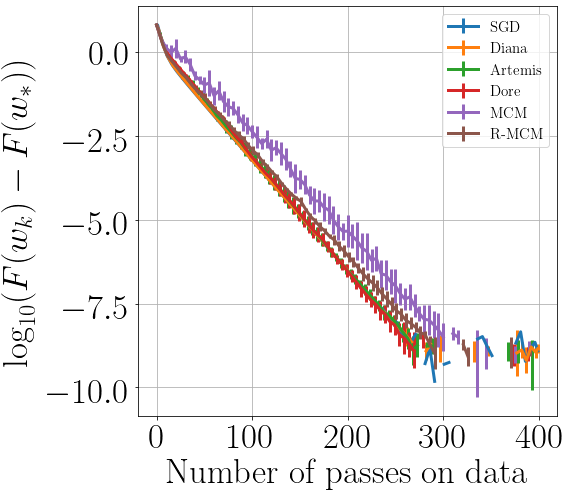

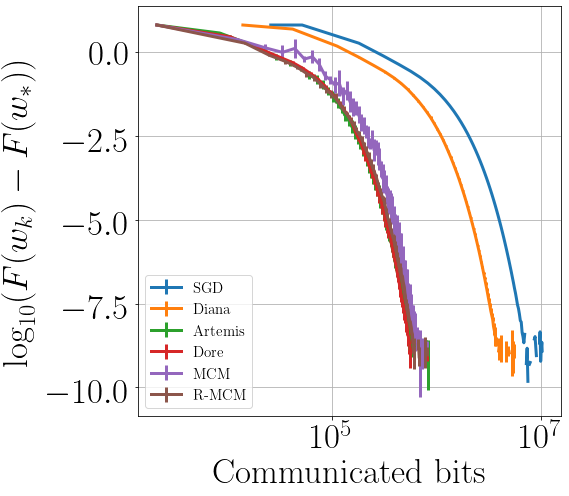

In [4]:
regenerate_and_plot_all_figures("synth_linear_noised", False)

## Logistic regression, toy dataset: $γ= 1/L$, $\sigma_*^2 = 0$.

Mode: full
Obj min: 0.31333252158745195


../src/utils/runner/ResultsOfSeveralDescents.py:94: RuntimeWarning: divide by zero encountered in log10
  log_losses = [np.log10(loss - obj) for loss in losses]
../src/utils/runner/ResultsOfSeveralDescents.py:94: RuntimeWarning: invalid value encountered in log10
  log_losses = [np.log10(loss - obj) for loss in losses]
../src/utils/runner/ResultsOfSeveralDescents.py:115: RuntimeWarning: divide by zero encountered in log10
  log_losses = [np.log10(loss - obj) for loss in losses]
../src/utils/runner/ResultsOfSeveralDescents.py:115: RuntimeWarning: invalid value encountered in log10
  log_losses = [np.log10(loss - obj) for loss in losses]
/home/constantin/anaconda3/envs/artemis/lib/python3.7/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially t

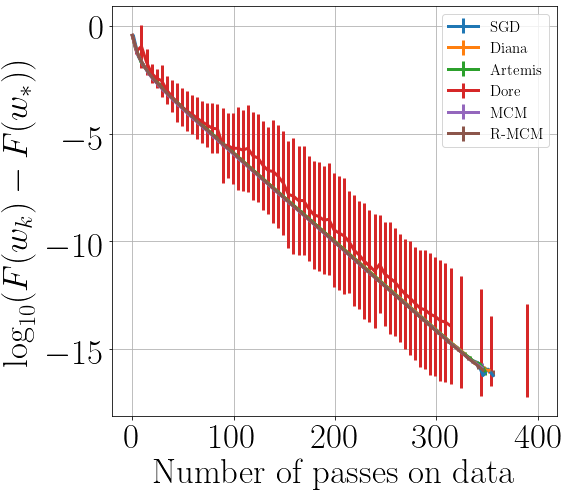

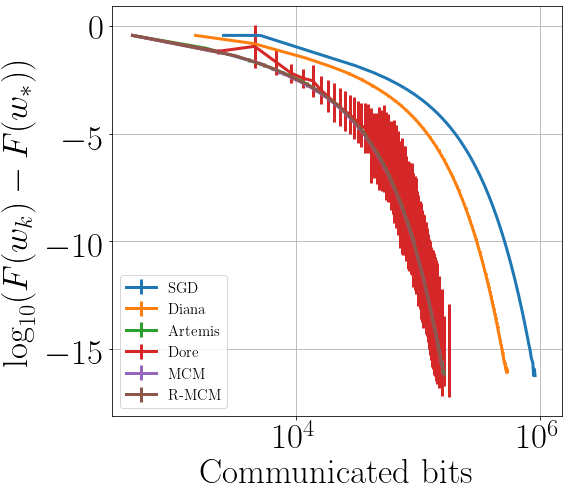

In [9]:
regenerate_and_plot_all_figures("synth_logistic", False)